In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [6]:
df_results = pd.read_csv('blip2_flickr_results.csv')
df_results = df_results.dropna(axis = 1, how = 'all')

with pd.option_context('display.max_rows', 10):
    display(df_results)


,txt_r1,txt_r5,txt_r10,txt_r_mean,img_r1,img_r5,img_r10,img_r_mean,r_mean,agg_metrics,...,qformer_layer_indices,qformer_self_attention_modules,qformer_self_attention_weight_bits,qformer_cross_attention_modules,qformer_cross_attention_weight_bits,qformer_text_ff_modules,qformer_text_ff_weight_bits,qformer_img_ff_modules,qformer_img_ff_weight_bits,job_batch
0,0.0,0.0,0.4,0.133333,0.10,0.34,0.72,0.386667,0.260000,0.133333,...,"[0, 1, 2, 3]",NaN,2.0,NaN,2.0,"['intermediate', 'output']",2.0,NaN,2.0,nbit_flickr_4_2
1,0.0,0.1,0.3,0.133333,0.06,0.22,0.56,0.280000,0.206667,0.133333,...,"[0, 1, 2, 3]",NaN,2.0,NaN,2.0,"['intermediate', 'output']",2.0,NaN,2.0,nbit_qformer
2,0.0,0.2,0.2,0.133333,0.14,0.30,0.72,0.386667,0.260000,0.133333,...,"[0, 1, 2, 3, 8, 9, 10, 11]",NaN,2.0,NaN,2.0,"['intermediate', 'output']",2.0,NaN,2.0,nbit_qformer
3,0.0,0.3,0.4,0.233333,0.14,0.42,0.62,0.393333,0.313333,0.233333,...,"[0, 1, 2, 3]","['query', 'key', 'value', 'dense']",2.0,"['query', 'key', 'value', 'dense']",2.0,"['intermediate', 'output']",2.0,NaN,2.0,nbit_flickr_4_2
4,0.0,0.3,0.7,0.333333,0.16,0.60,1.08,0.613333,0.473333,0.333333,...,"[4, 5, 6, 7]","['query', 'key', 'value', 'dense']",2.0,"['query', 'key', 'value', 'dense']",2.0,"['intermediate', 'output']",2.0,NaN,2.0,nbit_flickr_4_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,98.0,100.0,100.0,99.333333,88.12,97.88,98.82,94.940000,97.136667,99.333333,...,"[4, 5, 6, 7]",NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,nbit_flickr_4_2
976,98.0,100.0,100.0,99.333333,88.12,97.88,98.82,94.940000,97.136667,99.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nbit_vit
977,98.0,100.0,100.0,99.333333,89.60,98.10,98.96,95.553333,97.443333,99.333333,...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","['query', 'key', 'value', 'dense']",4.0,"['query', 'key', 'value', 'dense']",4.0,NaN,4.0,"['intermediate_query', 'output_query']",4.0,nbit_qformer
978,98.0,100.0,100.0,99.333333,89.66,98.10,98.92,95.560000,97.446667,99.333333,...,"[4, 5, 6, 7, 8, 9, 10, 11]","['query', 'key', 'value', 'dense']",4.0,"['query', 'key', 'value', 'dense']",4.0,NaN,4.0,"['intermediate_query', 'output_query']",4.0,nbit_qformer


In [9]:
df_results.columns

Index(['txt_r1', 'txt_r5', 'txt_r10', 'txt_r_mean', 'img_r1', 'img_r5',
       'img_r10', 'img_r_mean', 'r_mean', 'agg_metrics', 'model_size',
       'visual_encoder_block_modules', 'visual_encoder_block_indices',
       'visual_encoder_block_weight_bits', 'qformer_layer_indices',
       'qformer_self_attention_modules', 'qformer_self_attention_weight_bits',
       'qformer_cross_attention_modules',
       'qformer_cross_attention_weight_bits', 'qformer_text_ff_modules',
       'qformer_text_ff_weight_bits', 'qformer_img_ff_modules',
       'qformer_img_ff_weight_bits', 'job_batch'],
      dtype='object')

In [10]:
PARAM_COLS = ['visual_encoder_block_modules', 'visual_encoder_block_indices',
              'visual_encoder_block_weight_bits', 'qformer_layer_indices',
              'qformer_self_attention_modules', 'qformer_self_attention_weight_bits',
              'qformer_cross_attention_modules',
              'qformer_cross_attention_weight_bits', 'qformer_text_ff_modules',
              'qformer_text_ff_weight_bits', 'qformer_img_ff_modules',
              'qformer_img_ff_weight_bits']

In [11]:
['txt_r1'] + PARAM_COLS

['txt_r1',
 'visual_encoder_block_modules',
 'visual_encoder_block_indices',
 'visual_encoder_block_weight_bits',
 'qformer_layer_indices',
 'qformer_self_attention_modules',
 'qformer_self_attention_weight_bits',
 'qformer_cross_attention_modules',
 'qformer_cross_attention_weight_bits',
 'qformer_text_ff_modules',
 'qformer_text_ff_weight_bits',
 'qformer_img_ff_modules',
 'qformer_img_ff_weight_bits']

In [12]:
df_txt = df_results[['txt_r1'] + PARAM_COLS]

In [22]:
df_txt_pivot = df_txt.pivot_table(values=['txt_r1'],
                                  index= ['qformer_layer_indices',
                                          'qformer_self_attention_modules',
                                          'qformer_self_attention_weight_bits',
                                          'qformer_cross_attention_modules',
                                          'qformer_cross_attention_weight_bits',
                                          'qformer_text_ff_modules',
                                          'qformer_text_ff_weight_bits',
                                          'qformer_img_ff_modules',
                                          'qformer_img_ff_weight_bits'],   
                                  columns=['visual_encoder_block_modules',
                                           'visual_encoder_block_indices',
                                           'visual_encoder_block_weight_bits'])

df_txt_pivot = df_txt_pivot.fillna(0)

/fs/nexus-scratch/vla/micromamba/envs/VIT/lib/python3.10/site-packages/seaborn/matrix.py:1113: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(**tight_params)


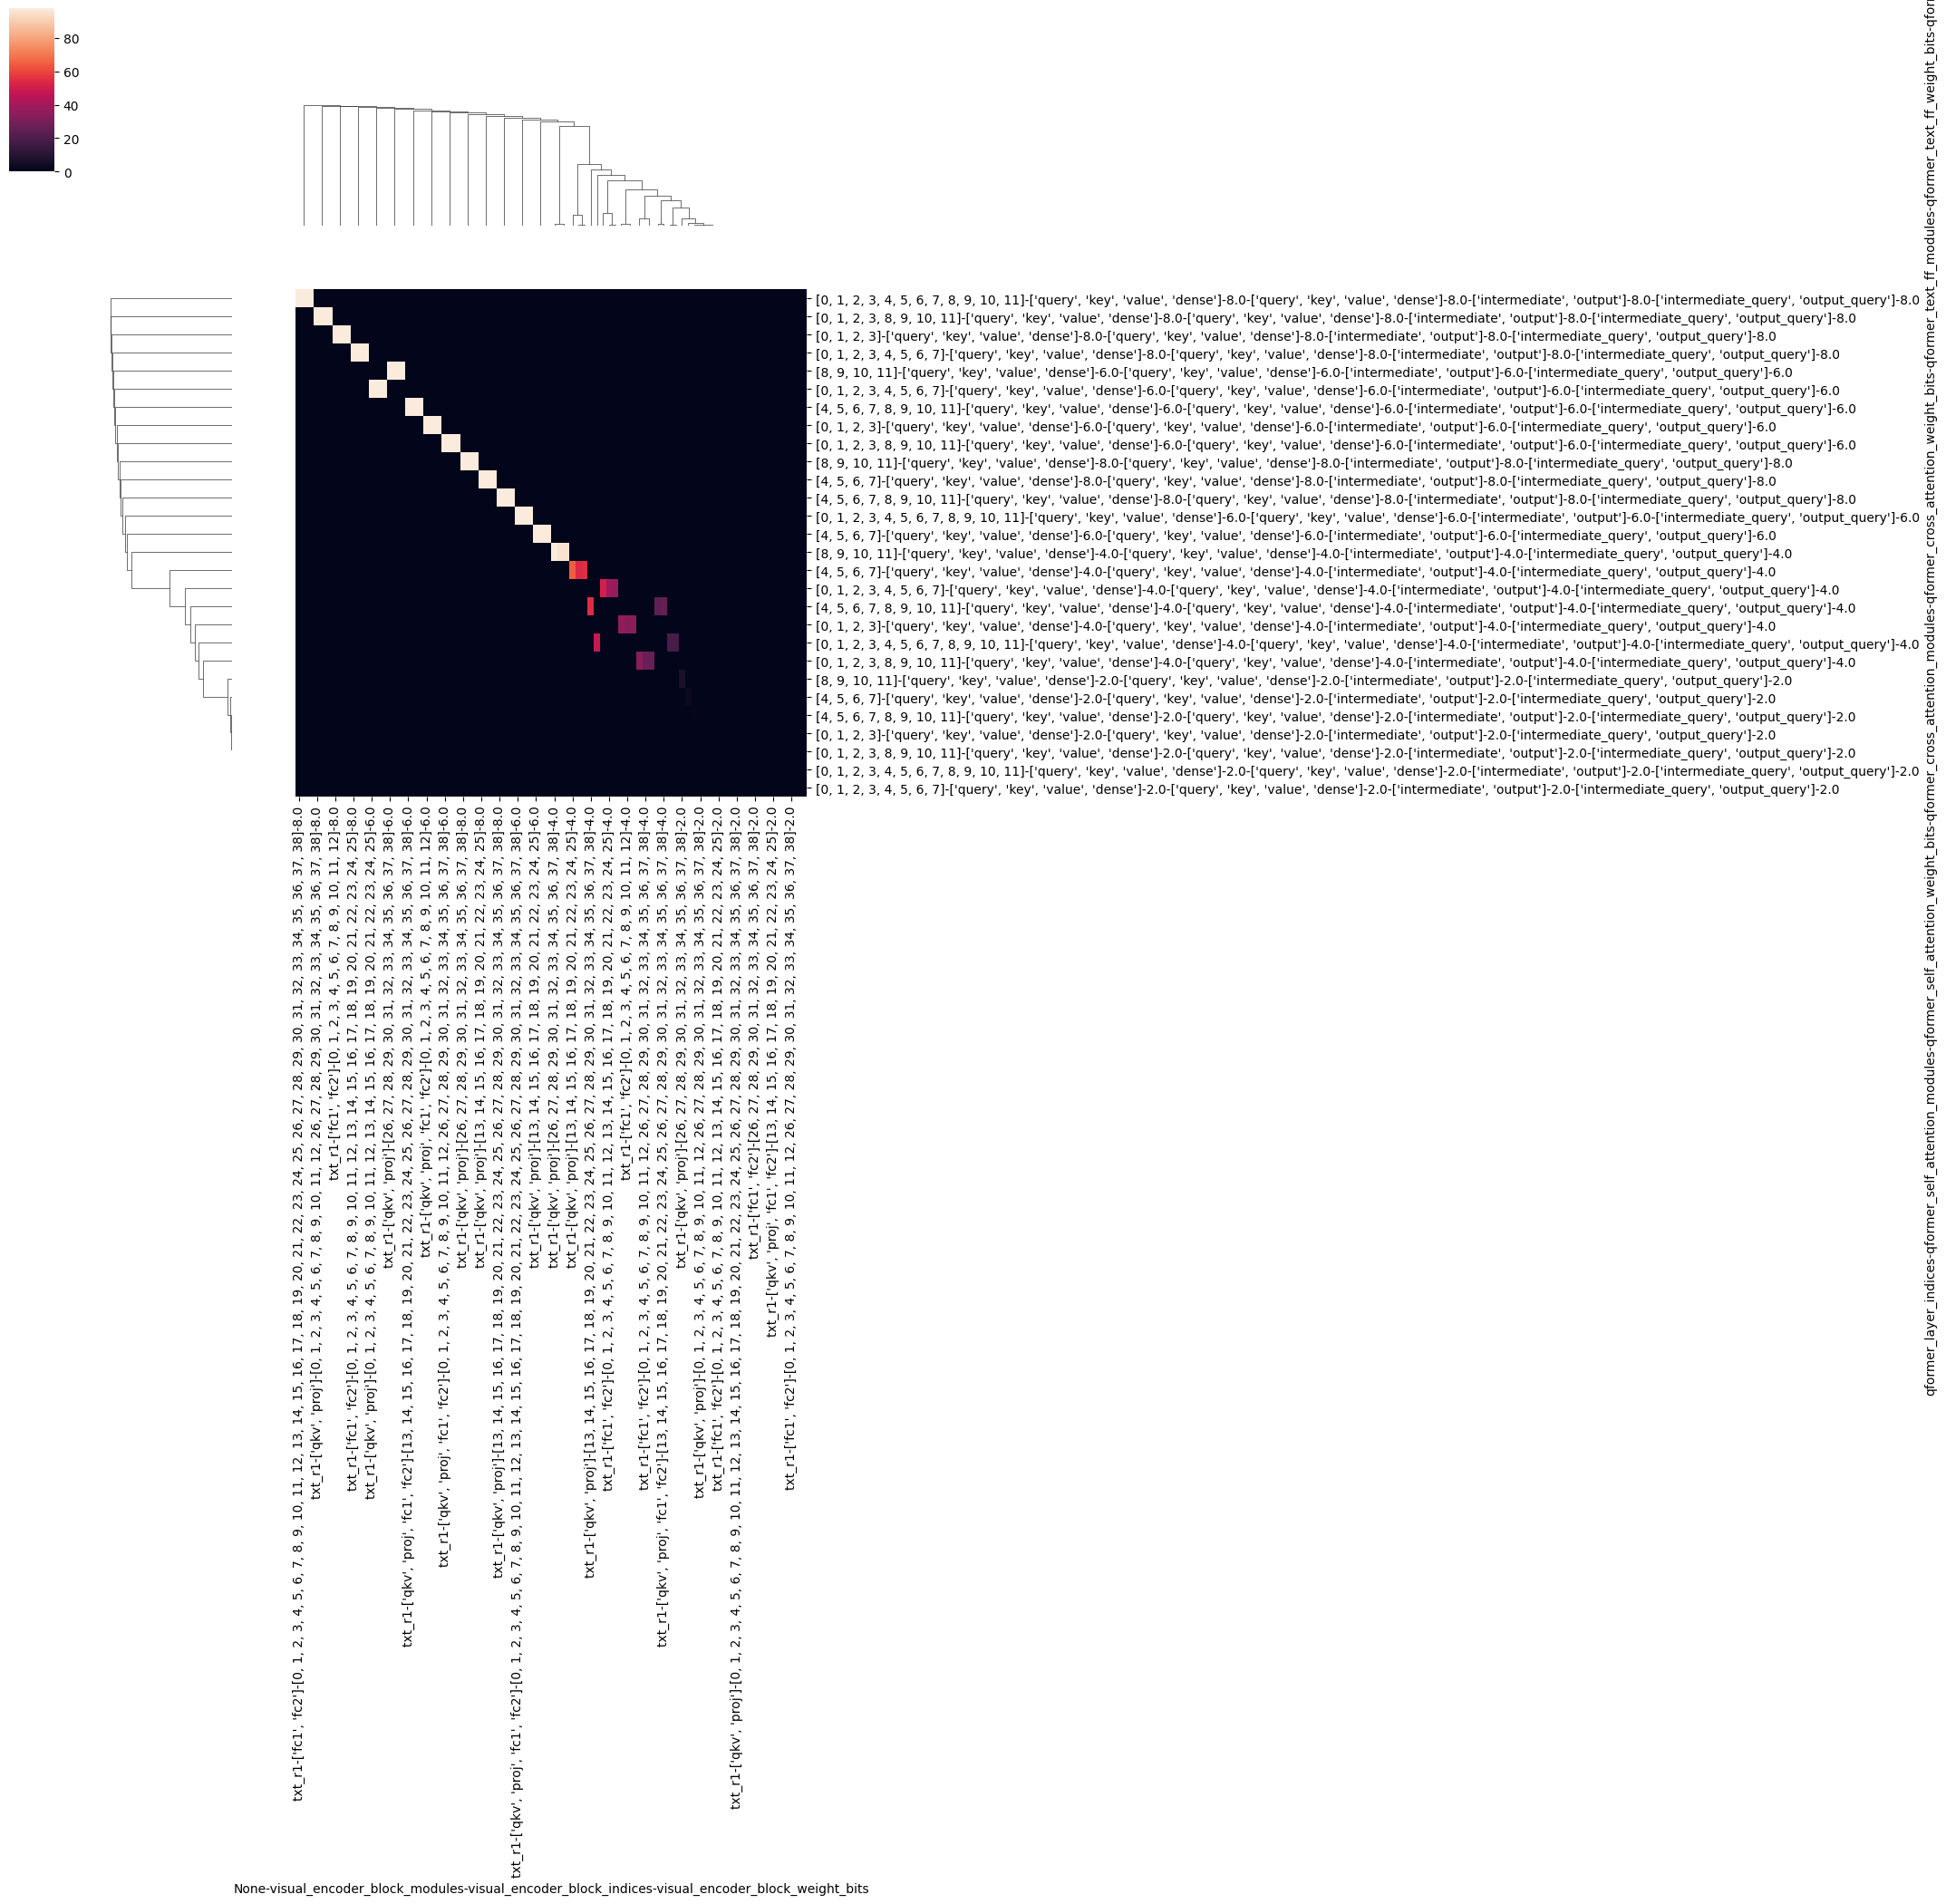

In [24]:
sns.clustermap(df_txt_pivot, annot=False)